In [77]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [110]:
## default

train_default = {}
valid_default = {}
with open('kaggle_kernel_default.txt') as f:
    for i, line in enumerate(f):
        lines = line.strip('\n').split(' ')
        if lines[0] == 'train':
            train_default[lines[1]] = (float(lines[-3]), float(lines[-1]))
        elif lines[0] == 'valid':
            valid_default[lines[1]] = (float(lines[-3]), float(lines[-1]))

In [112]:
## pruning

train_pruning = {}
valid_pruning = {}
sparse_pruning = {}
with open('kaggle_kernel_pruning.txt') as f:
    for i, line in enumerate(f):
        lines = line.strip('\n').split(' ')
        if lines[0] == 'train':
            train_pruning[lines[1]] = (float(lines[4]), float(lines[6]))
        elif lines[0] == 'valid':
            valid_pruning[lines[1]] = (float(lines[4]), float(lines[6]))
        elif lines[0] == '====>':
            sparse_pruning[i//4] = (lines[2], lines[-1])

In [113]:
## decorrelation

train_decor = {}
valid_decor = {}
with open('kaggle_kernel_decorrelation.txt') as f:
    for i, line in enumerate(f):
        lines = line.strip('\n').split(' ')
        if lines[0] == 'train':
            train_decor[lines[1]] = (float(lines[-3]), float(lines[-1]))
        elif lines[0] == 'valid':
            valid_decor[lines[1]] = (float(lines[-3]), float(lines[-1]))

In [134]:
## pruning + decorrelation

train_pruning_decor= {}
valid_pruning_decor= {}
sparse_pruning_decor= {}
with open('kaggle_kernel_pruning+decorrelation.txt') as f:
    for i, line in enumerate(f):
        lines = line.strip('\n').split(' ')
        if lines[0] == 'train':
            train_pruning_decor[lines[1]] = (float(lines[4]), float(lines[6]))
        elif lines[0] == 'valid':
            valid_pruning_decor[lines[1]] = (float(lines[4]), float(lines[6]))
        elif lines[0] == '====>':
            sparse_pruning_decor[i//4] = (lines[2], lines[-1])

In [55]:
sparse_pruning.values()

dict_values([('59.47%', '508936/855770'), ('59.50%', '509224/855770'), ('59.49%', '509080/855770'), ('59.49%', '509080/855770'), ('59.49%', '509080/855770'), ('59.49%', '509080/855770'), ('59.49%', '509080/855770'), ('59.49%', '509080/855770'), ('59.45%', '508792/855770'), ('59.49%', '509080/855770'), ('59.44%', '508648/855770'), ('59.39%', '508216/855770'), ('59.39%', '508216/855770'), ('59.39%', '508216/855770'), ('59.39%', '508216/855770'), ('59.39%', '508216/855770'), ('59.39%', '508216/855770'), ('59.39%', '508216/855770'), ('59.39%', '508216/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), ('59.34%', '507784/855770'), (

In [135]:
def acc1_acc5(result_dict):
    acc1 = []
    acc5 = []
    for val in result_dict.values():
        acc1.append(val[0])
        acc5.append(val[1])
    return acc1, acc5

train_default_acc1, train_default_acc5 = acc1_acc5(train_default)
valid_default_acc1, valid_default_acc5 = acc1_acc5(valid_default)
train_pruning_acc1, train_pruning_acc5 = acc1_acc5(train_pruning)
valid_pruning_acc1, valid_pruning_acc5 = acc1_acc5(valid_pruning)
sparse_pruning_per, sparse_pruning_num = acc1_acc5(sparse_pruning)
train_decor_acc1, train_decor_acc5 = acc1_acc5(train_decor)
valid_decor_acc1, valid_decor_acc5 = acc1_acc5(valid_decor)
train_pruning_decor_acc1, train_pruning_decor_acc5 = acc1_acc5(train_pruning_decor)
valid_pruning_decor_acc1, valid_pruning_decor_acc5 = acc1_acc5(valid_pruning_decor)
sparse_pruning_decor_per, sparse_pruning_decor_num = acc1_acc5(sparse_pruning_decor)

In [153]:
np.mean(valid_default_acc5) - np.mean(valid_decor_acc5)

0.3022617021276659

In [169]:
np.max(valid_pruning_decor_acc1[:len(valid_pruning_decor)])
valid_pruning_decor

{'0': (27.51, 82.34),
 '1': (24.25, 77.6),
 '2': (32.21, 84.21),
 '3': (32.18, 81.04),
 '4': (33.76, 86.48),
 '5': (36.8, 87.45),
 '6': (35.68, 86.41),
 '7': (39.8, 90.53),
 '8': (35.53, 87.19),
 '9': (38.46, 87.84),
 '10': (42.53, 91.01),
 '11': (41.9, 90.13),
 '12': (44.58, 91.91),
 '13': (43.67, 91.35),
 '14': (47.0, 92.77),
 '15': (49.44, 92.75),
 '16': (47.72, 92.6),
 '17': (45.4, 91.43),
 '18': (49.42, 92.43),
 '19': (45.74, 88.6),
 '20': (51.31, 93.61),
 '21': (50.03, 92.73),
 '22': (46.25, 91.27),
 '23': (54.92, 94.34),
 '24': (50.15, 92.82),
 '25': (50.09, 92.61),
 '26': (52.16, 92.64),
 '27': (51.97, 93.74),
 '28': (55.03, 94.35),
 '29': (55.44, 94.54),
 '30': (57.37, 94.65),
 '31': (51.79, 93.35),
 '32': (55.9, 94.76),
 '33': (52.7, 94.46),
 '34': (56.31, 92.82),
 '35': (53.29, 93.32),
 '36': (60.55, 95.91),
 '37': (58.16, 95.35),
 '38': (57.39, 94.89),
 '39': (55.6, 93.33),
 '40': (61.26, 95.11),
 '41': (59.41, 95.89),
 '42': (61.21, 95.48),
 '43': (61.28, 96.09),
 '44': (6

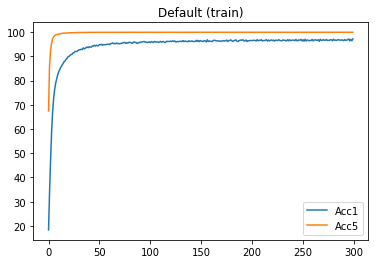

In [124]:
plt.plot(train_default_acc1)
plt.plot(train_default_acc5)
plt.title('Default (train)')
plt.legend(['Acc1', 'Acc5'])
plt.show()

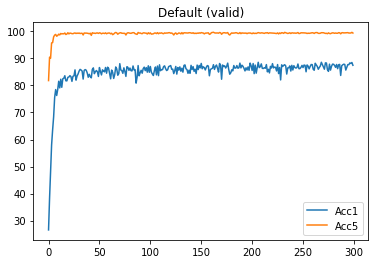

In [125]:
plt.plot(valid_default_acc1)
plt.plot(valid_default_acc5)
plt.title('Default (valid)')
plt.legend(['Acc1', 'Acc5'])
# plt.yticks([0,100, 200, 300])
plt.show()

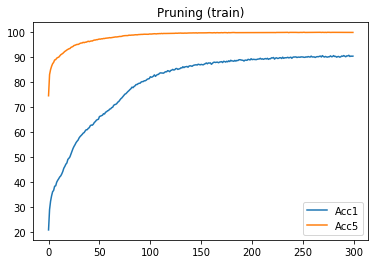

In [126]:
plt.plot(train_pruning_acc1)
plt.plot(train_pruning_acc5)
plt.title('Pruning (train)')
plt.legend(['Acc1', 'Acc5'])
plt.show()

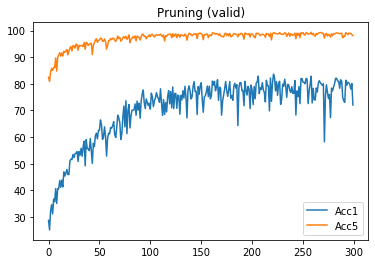

In [127]:
plt.plot(valid_pruning_acc1)
plt.plot(valid_pruning_acc5)
plt.title('Pruning (valid)')
plt.legend(['Acc1', 'Acc5'])
plt.show()

In [128]:
float(valid_pruning_acc1[0])

28.72

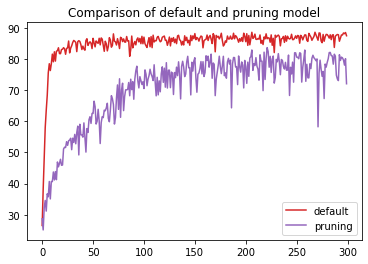

In [133]:
plt.plot(valid_default_acc1, 'C3')
plt.plot(valid_pruning_acc1, 'C4')
plt.legend(['default', 'pruning'])
plt.title('Comparison of default and pruning model')
# plt.yticks([0, 25, 50, 100, 125, 150, 175, 200, 225, 275, 300])
plt.show()

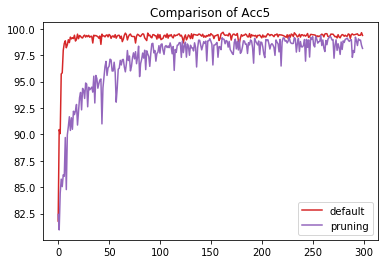

In [130]:
plt.plot(valid_default_acc5, 'C3')
plt.plot(valid_pruning_acc5, 'C4')
plt.legend(['default', 'pruning'])
plt.title('Comparison of Acc5')
plt.show()

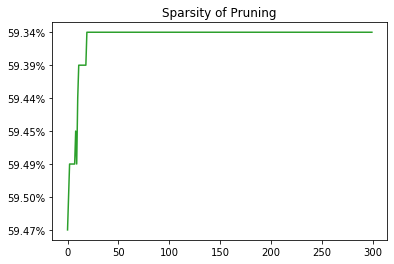

In [131]:
plt.plot(sparse_pruning_per, 'C2')
plt.title('Sparsity of Pruning')
plt.show()

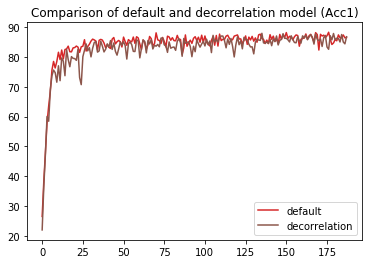

In [144]:
plt.plot(valid_default_acc1[:len(valid_decor_acc1)], 'C3')
plt.plot(valid_decor_acc1, 'C5')
plt.legend(['default', 'decorrelation'])
plt.title('Comparison of default and decorrelation model (Acc1)')
plt.show()

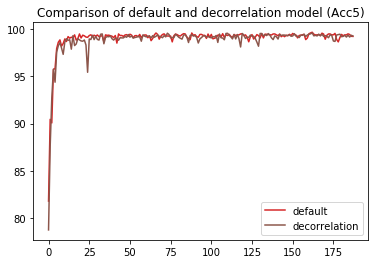

In [145]:
plt.plot(valid_default_acc5[:len(valid_decor_acc5)], 'C3')
plt.plot(valid_decor_acc5, 'C5')
plt.legend(['default', 'decorrelation'])
plt.title('Comparison of default and decorrelation model (Acc5)')
plt.show()

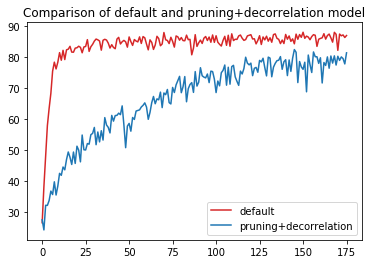

In [141]:
plt.plot(valid_default_acc1[:len(valid_pruning_decor_acc1)], 'C3')
plt.plot(valid_pruning_decor_acc1)
plt.legend(['default', 'pruning+decorrelation'])
plt.title('Comparison of default and pruning+decorrelation model')
plt.show()

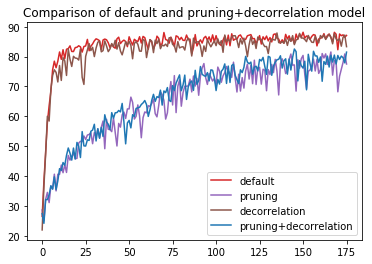

In [147]:
plt.plot(valid_default_acc1[:len(valid_pruning_decor_acc1)], 'C3')
plt.plot(valid_pruning_acc1[:len(valid_pruning_decor_acc1)], 'C4')
plt.plot(valid_decor_acc1[:len(valid_pruning_decor_acc1)], 'C5')
plt.plot(valid_pruning_decor_acc1)
plt.legend(['default', 'pruning','decorrelation','pruning+decorrelation'])
plt.title('Comparison of default and pruning+decorrelation model')
plt.show()

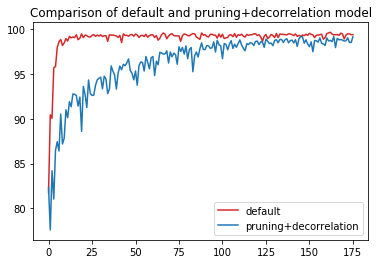

In [142]:
plt.plot(valid_default_acc5[:len(valid_pruning_decor_acc5)], 'C3')
plt.plot(valid_pruning_decor_acc5)
plt.legend(['default', 'pruning+decorrelation'])
plt.title('Comparison of default and pruning+decorrelation model')
plt.show()

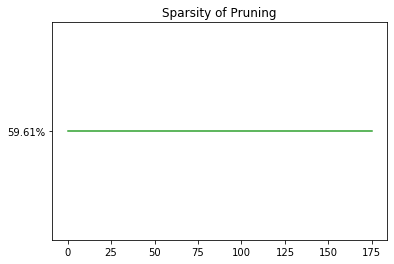

In [156]:
plt.plot(sparse_pruning_decor_per, 'C2')
plt.title('Sparsity of Pruning')
plt.show()